In [1]:
from deep_snow.application import predict_sd, download_data, apply_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up arguments 
aoi = {'minlon':-108.1239, 'minlat':37.6393, 'maxlon':-107.5878, 'maxlat':38.0641}
target_date = '20240320'
snowoff_date = '20230910'
model_path = '../../weights/quinn_ResDepth_v11_254epochs'
out_dir = '../../data/application'

In [3]:
ds = predict_sd(aoi=aoi, target_date=target_date, snowoff_date=snowoff_date, model_path=model_path, out_dir=out_dir)

searching for Sentinel-1 snow-on data
Returned 5 acquisitions


/mnt/Backups/gbrench/sw/miniconda3/envs/deep-snow/lib/python3.11/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


searching for Sentinel-1 snow-off data
Returned 5 acquisitions
searching for Sentinel-2 snow-on data
Returned 1 acquisitions
Searching for snodas data


--2025-04-16 10:21:04--  https://noaadata.apps.nsidc.org/NOAA/G02158/masked/2024/03_Mar/SNODAS_20240320.tar
Resolving noaadata.apps.nsidc.org (noaadata.apps.nsidc.org)... 128.138.135.43
Connecting to noaadata.apps.nsidc.org (noaadata.apps.nsidc.org)|128.138.135.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11776000 (11M) [application/octet-stream]
Saving to: ‘/tmp/snodas/SNODAS_20240320.tar.5’

     0K .......... .......... .......... .......... ..........  0%  598K 19s
    50K .......... .......... .......... .......... ..........  0% 1.16M 14s
   100K .......... .......... .......... .......... ..........  1% 61.8M 10s
   150K .......... .......... .......... .......... ..........  1% 1.19M 9s
   200K .......... .......... .......... .......... ..........  2% 78.6M 8s
   250K .......... .......... .......... .......... ..........  2% 91.9M 6s
   300K .......... .......... .......... .......... ..........  3% 96.4M 5s
   350K .......... .......... ......

searching for COP30 dem data
combining datasets
writing input data
finished preparing dataset!
reading input data
loading model
prediction finished!


AttributeError: module 'cftime' has no attribute 'datetime'

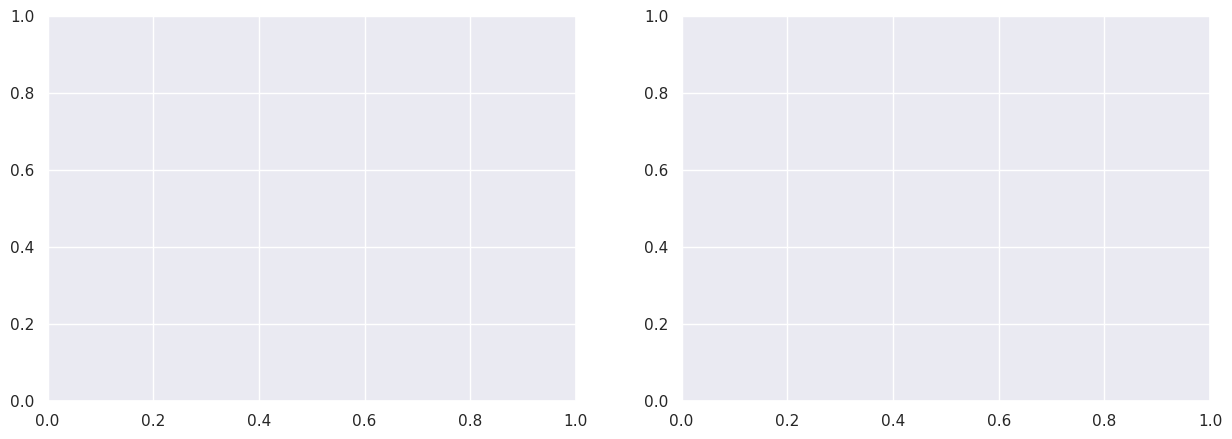

In [4]:
sns.set_theme()
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ds.predicted_sd_corrected.plot(ax=ax[0], cmap='Blues', vmin=0, vmax=3)
ax[0].set_aspect('equal')
ax[0].set_title('predicted snow depth')

ds.data_gaps.plot(ax=ax[1], cmap='Purples')
ax[1].set_aspect('equal')
ax[1].set_title('gaps in input data')

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ds.predicted_sd_corrected.plot(ax=ax[0], cmap='Blues', vmin=0, vmax=3, cbar_kwargs={'shrink':0.6})
ax[0].set_title('deep predicted snow depth')

rgb = ds[['B04', 'B03', 'B02']].to_array(dim='band')
rgb = rgb.rename('reflectance')
rgb = rgb/15000
im1 = rgb.plot.imshow(ax=ax[1])
ax[1].set_title('Sentinel-2 true color image')
cbar = f.colorbar(im1, ax=ax[1], shrink=0.6)

ds.elevation.plot(ax=ax[2], cbar_kwargs={'shrink':0.6})
ax[2].set_title('elevation')

for a in ax.flat:
    a.set_aspect('equal')
    a.grid(False)

f.tight_layout()

In [ ]:
from deep_snow.application import predict_sd_ts

In [ ]:
ds = predict_sd_ts(aoi=aoi, target_date=target_date, snowoff_date=snowoff_date, model_path=model_path, out_dir=out_dir)